<a href="https://colab.research.google.com/github/aksanaboo/bonetumor/blob/main/Mice_protein_expression_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
protein_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_Cortex_Nuclear.csv')

In [4]:
protein_data.shape

(1080, 82)

In [5]:
protein_data.head()

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0   309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1   309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2   309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3   309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4   309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   

    pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0  0.177565   2.373744  0.232224  ...  0.108336  0.427099   0.114783   
1  0.172817   2.292150  0.226972  ...  0.104315  0.441581   0.111974   
2  0.175722   2.283337  0.230247  ...  0.106219  0.435777   0.111883   
3  0.176463   2.152301  0.207004  ...  0.111262  0.391691   0.130405   
4  0.173627   2.134014  0.192158  ...  0.110694  0.434154   0.118481   

     EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class  
0  0.131790  0.128186  1.675652   Control  Memantine       C/S  c-CS-m  
1  0.135103  0.131119  1.743610   Control  Memantine       C/S  c-CS-m  
2  0.133362  0.127431  1.926427   Control  Memantine       C/S  c-CS-m  
3  0.147444  0.146901  1.700563   Control  Memantine       C/S  c-CS-m  
4  0.140314  0.148380  1.839730   Control  Memantine       C/S  c-CS-m  

[5 rows x 82 columns]

In [6]:
# MouseID + 77 proteins/protein modifications + Genotype + Treatment + Behaviour + class

In [7]:
# Expression levels of 77 proteins
# There are 38 control mice and 34 trisomic mice (Down syndrome) =  total of 72 mice
# In the experiments, 15 measurements were registered of each protein per sample/mouse
# Therefore, for control mice, there are 38x15, or 570 measurements
#for trisomic mice, there are 34x15, or 510 measurements
#The dataset contains a total of 1080 measurements per protein

In [8]:
# each row must be considered as an independent measurement

In [9]:
# 1  c/t = control / trisomic
# 2  CS/SC = context-shock(stimulated to learn) / shock-context
# 3  s/m = saline / memantine


Classes:

c-CS-s: control mice, stimulated to learn, injected with saline (9 mice)

c-CS-m: control mice, stimulated to learn, injected with memantine (10 mice)

c-SC-s: control mice, not stimulated to learn, injected with saline (9 mice)

c-SC-m: control mice, not stimulated to learn, injected with memantine (10 mice)

t-CS-s: trisomy mice, stimulated to learn, injected with saline (7 mice)

t-CS-m: trisomy mice, stimulated to learn, injected with memantine (9 mice)

t-SC-s: trisomy mice, not stimulated to learn, injected with saline (9 mice)

t-SC-m: trisomy mice, not stimulated to learn, injected with memantine (9 mice)

In [10]:
#The aim is to identify subsets of proteins that are discriminant between the classes (proteins that make the difference)

In [11]:
protein_class = protein_data.groupby('class').sum()

<ipython-input-11-57af168e9ec5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  protein_class = protein_data.groupby('class').sum()


In [12]:
protein_class =  protein_class.reset_index()

In [13]:
protein_class = pd.DataFrame(protein_class)

In [14]:
protein_class

class   DYRK1A_N     ITSN1_N     BDNF_N       NR1_N      NR2A_N  \
0  c-CS-m  72.068463   97.888099  50.882614  357.262336  646.281072   
1  c-CS-s  80.561023  104.273350  46.212571  326.404225  577.810416   
2  c-SC-m  40.980441   65.454125  43.641865  321.844990  518.912375   
3  c-SC-s  37.101160   60.662751  42.307991  324.671514  528.268007   
4  t-CS-m  83.604680  107.595879  42.218850  296.533023  481.404572   
5  t-CS-s  55.202171   79.753430  32.073347  229.383673  369.058044   
6  t-SC-m  44.531192   76.515771  43.343548  321.225185  547.590109   
7  t-SC-s  44.548415   72.475426  42.977405  296.833883  470.592265   

      pAKT_N    pBRAF_N   pCAMKII_N    pCREB_N  ...      SHH_N      BAD_N  \
0  34.489790  27.331679  437.428003  29.772607  ...  34.036583  18.825781   
1  28.677077  22.728024  396.302787  28.139292  ...  29.000491  13.020258   
2  36.187930  28.432012  710.449078  31.222310  ...  33.670450  17.267993   
3  31.504675  24.971563  453.773827  29.018092  ...  32.650108  18.734506   
4  28.838875  23.484025  421.443105  27.458326  ...  29.286033  15.810054   
5  22.518880  17.303457  261.334706  22.054253  ...  23.325122  15.842802   
6  36.332620  27.135944  577.429716  31.291491  ...  31.140104  13.832758   
7  32.572199  24.461921  551.305282  29.985753  ...  31.701721  23.577498   

      BCL2_N      pS6_N    pCFOS_N      SYP_N  H3AcK18_N     EGR1_N  \
0  15.904735  17.967242  14.871518  70.110492  17.043256  20.951926   
1  13.291914  15.189144  17.138759  60.118410  15.281887  17.486039   
2  11.698487  19.216169  21.542070  68.531036  22.279724  22.820599   
3  13.973645  17.945421  18.225918  63.654123  18.297566  24.082788   
4  15.840650  14.606458  15.331443  55.835644  17.944651  17.047729   
5  11.716784  11.692140  10.977381  45.526596  16.630753  14.235695   
6  12.371993  18.533737  17.581609  60.174618  16.964795  20.589311   
7  12.337383  16.092172  16.039605  57.807940  28.205672  22.112961   

    H3MeK4_N      CaNA_N  
0  16.080782  228.548841  
1  15.480669  218.377167  
2  19.874248  151.493594  
3  23.007617  156.281214  
4  18.996648  220.500984  
5  20.100153  163.026469  
6  22.288721  140.553109  
7  30.577217  166.025073  

[8 rows x 78 columns]

In [15]:
protein_class.describe()

DYRK1A_N     ITSN1_N     BDNF_N       NR1_N      NR2A_N     pAKT_N  \
count   8.000000    8.000000   8.000000    8.000000    8.000000   8.000000   
mean   57.324693   83.077354  42.957274  309.269854  517.489608  31.390256   
std    18.729203   17.925572   5.257008   37.481085   81.751801   4.645029   
min    37.101160   60.662751  32.073347  229.383673  369.058044  22.518880   
25%    43.643504   70.720100  42.285706  296.758668  478.701495  28.798425   
50%    49.875293   78.134601  43.160477  321.535087  523.590191  32.038437   
75%    74.191603   99.484412  44.284541  325.104692  555.145185  34.914325   
max    83.604680  107.595879  50.882614  357.262336  646.281072  36.332620   

         pBRAF_N   pCAMKII_N    pCREB_N      pELK_N  ...      SHH_N  \
count   8.000000    8.000000   8.000000    8.000000  ...   8.000000   
mean   24.481078  476.183313  28.617765  192.336303  ...  30.601326   
std     3.517520  135.391530   2.974912   26.716059  ...   3.467296   
min    17.303457  261.334706  22.054253  159.038819  ...  23.325122   
25%    23.295025  415.158026  27.969051  174.286516  ...  29.214647   
50%    24.716742  445.600915  29.395349  189.144779  ...  31.420912   
75%    27.184878  557.836391  30.294892  214.307343  ...  32.905193   
max    28.432012  710.449078  31.291491  227.723955  ...  34.036583   

           BAD_N     BCL2_N      pS6_N    pCFOS_N      SYP_N  H3AcK18_N  \
count   8.000000   8.000000   8.000000   8.000000   8.000000   8.000000   
mean   17.113956  13.391949  16.405310  16.463538  60.219857  19.081038   
std     3.342331   1.710682   2.514803   3.040143   7.742623   4.216705   
min    13.020258  11.698487  11.692140  10.977381  45.526596  15.281887   
25%    15.315730  12.182233  15.043473  15.216462  57.314866  16.881285   
50%    16.555397  12.831953  17.018797  16.589182  60.146514  17.493953   
75%    18.757324  14.440396  18.108865  17.742686  64.873351  19.293106   
max    23.577498  15.904735  19.216169  21.542070  70.110492  28.205672   

          EGR1_N   H3MeK4_N      CaNA_N  
count   8.000000   8.000000    8.000000  
mean   19.915881  20.800757  180.600806  
std     3.349830   4.748669   35.620803  
min    14.235695  15.480669  140.553109  
25%    17.376461  18.267681  155.084309  
50%    20.770619  19.987201  164.525771  
75%    22.289871  22.468445  218.908121  
max    24.082788  30.577217  228.548841  

[8 rows x 77 columns]

In [16]:
# data exploration with sweetviz

In [17]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 40.5 MB/s eta 0:00:00


In [18]:
protein_class.head()

class   DYRK1A_N     ITSN1_N     BDNF_N       NR1_N      NR2A_N  \
0  c-CS-m  72.068463   97.888099  50.882614  357.262336  646.281072   
1  c-CS-s  80.561023  104.273350  46.212571  326.404225  577.810416   
2  c-SC-m  40.980441   65.454125  43.641865  321.844990  518.912375   
3  c-SC-s  37.101160   60.662751  42.307991  324.671514  528.268007   
4  t-CS-m  83.604680  107.595879  42.218850  296.533023  481.404572   

      pAKT_N    pBRAF_N   pCAMKII_N    pCREB_N  ...      SHH_N      BAD_N  \
0  34.489790  27.331679  437.428003  29.772607  ...  34.036583  18.825781   
1  28.677077  22.728024  396.302787  28.139292  ...  29.000491  13.020258   
2  36.187930  28.432012  710.449078  31.222310  ...  33.670450  17.267993   
3  31.504675  24.971563  453.773827  29.018092  ...  32.650108  18.734506   
4  28.838875  23.484025  421.443105  27.458326  ...  29.286033  15.810054   

      BCL2_N      pS6_N    pCFOS_N      SYP_N  H3AcK18_N     EGR1_N  \
0  15.904735  17.967242  14.871518  70.110492  17.043256  20.951926   
1  13.291914  15.189144  17.138759  60.118410  15.281887  17.486039   
2  11.698487  19.216169  21.542070  68.531036  22.279724  22.820599   
3  13.973645  17.945421  18.225918  63.654123  18.297566  24.082788   
4  15.840650  14.606458  15.331443  55.835644  17.944651  17.047729   

    H3MeK4_N      CaNA_N  
0  16.080782  228.548841  
1  15.480669  218.377167  
2  19.874248  151.493594  
3  23.007617  156.281214  
4  18.996648  220.500984  

[5 rows x 78 columns]

In [19]:
protein_class.isnull().sum()

class        0
DYRK1A_N     0
ITSN1_N      0
BDNF_N       0
NR1_N        0
            ..
SYP_N        0
H3AcK18_N    0
EGR1_N       0
H3MeK4_N     0
CaNA_N       0
Length: 78, dtype: int64

In [20]:
protein_class.duplicated().sum()

0

In [21]:
#Data visualisation

In [22]:
protein_data.head()

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0   309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1   309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2   309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3   309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4   309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   

    pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0  0.177565   2.373744  0.232224  ...  0.108336  0.427099   0.114783   
1  0.172817   2.292150  0.226972  ...  0.104315  0.441581   0.111974   
2  0.175722   2.283337  0.230247  ...  0.106219  0.435777   0.111883   
3  0.176463   2.152301  0.207004  ...  0.111262  0.391691   0.130405   
4  0.173627   2.134014  0.192158  ...  0.110694  0.434154   0.118481   

     EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class  
0  0.131790  0.128186  1.675652   Control  Memantine       C/S  c-CS-m  
1  0.135103  0.131119  1.743610   Control  Memantine       C/S  c-CS-m  
2  0.133362  0.127431  1.926427   Control  Memantine       C/S  c-CS-m  
3  0.147444  0.146901  1.700563   Control  Memantine       C/S  c-CS-m  
4  0.140314  0.148380  1.839730   Control  Memantine       C/S  c-CS-m  

[5 rows x 82 columns]

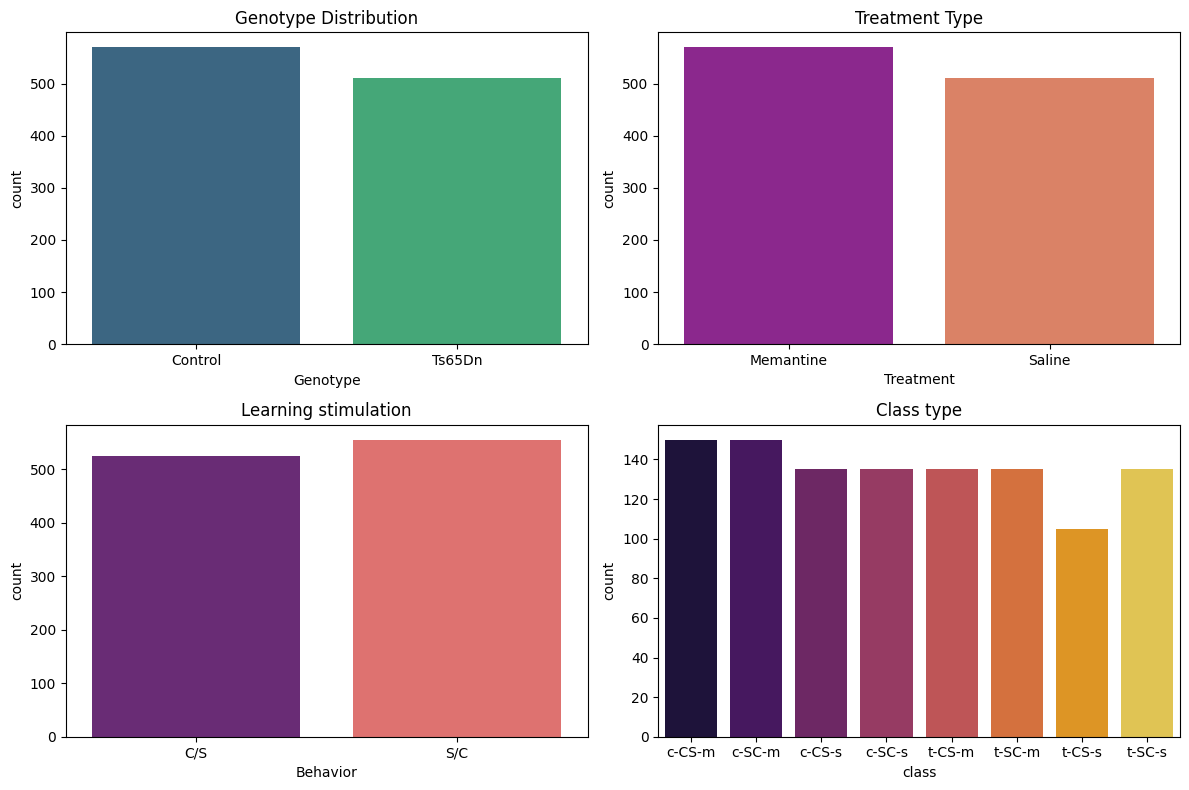

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.countplot(data=protein_data, x='Genotype', palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Genotype Distribution')

sns.countplot(data=protein_data, x='Treatment', palette='plasma', ax=axes[0, 1])
axes[0, 1].set_title('Treatment Type')

sns.countplot(data=protein_data, x='Behavior', palette='magma', ax=axes[1, 0])
axes[1, 0].set_title('Learning stimulation')

sns.countplot(data=protein_data, x='class', palette='inferno', ax=axes[1, 1])
axes[1, 1].set_title('Class type')

plt.tight_layout()
plt.show()

In [24]:
protein_class.head()

class   DYRK1A_N     ITSN1_N     BDNF_N       NR1_N      NR2A_N  \
0  c-CS-m  72.068463   97.888099  50.882614  357.262336  646.281072   
1  c-CS-s  80.561023  104.273350  46.212571  326.404225  577.810416   
2  c-SC-m  40.980441   65.454125  43.641865  321.844990  518.912375   
3  c-SC-s  37.101160   60.662751  42.307991  324.671514  528.268007   
4  t-CS-m  83.604680  107.595879  42.218850  296.533023  481.404572   

      pAKT_N    pBRAF_N   pCAMKII_N    pCREB_N  ...      SHH_N      BAD_N  \
0  34.489790  27.331679  437.428003  29.772607  ...  34.036583  18.825781   
1  28.677077  22.728024  396.302787  28.139292  ...  29.000491  13.020258   
2  36.187930  28.432012  710.449078  31.222310  ...  33.670450  17.267993   
3  31.504675  24.971563  453.773827  29.018092  ...  32.650108  18.734506   
4  28.838875  23.484025  421.443105  27.458326  ...  29.286033  15.810054   

      BCL2_N      pS6_N    pCFOS_N      SYP_N  H3AcK18_N     EGR1_N  \
0  15.904735  17.967242  14.871518  70.110492  17.043256  20.951926   
1  13.291914  15.189144  17.138759  60.118410  15.281887  17.486039   
2  11.698487  19.216169  21.542070  68.531036  22.279724  22.820599   
3  13.973645  17.945421  18.225918  63.654123  18.297566  24.082788   
4  15.840650  14.606458  15.331443  55.835644  17.944651  17.047729   

    H3MeK4_N      CaNA_N  
0  16.080782  228.548841  
1  15.480669  218.377167  
2  19.874248  151.493594  
3  23.007617  156.281214  
4  18.996648  220.500984  

[5 rows x 78 columns]

In [25]:
protein_class.describe()

DYRK1A_N     ITSN1_N     BDNF_N       NR1_N      NR2A_N     pAKT_N  \
count   8.000000    8.000000   8.000000    8.000000    8.000000   8.000000   
mean   57.324693   83.077354  42.957274  309.269854  517.489608  31.390256   
std    18.729203   17.925572   5.257008   37.481085   81.751801   4.645029   
min    37.101160   60.662751  32.073347  229.383673  369.058044  22.518880   
25%    43.643504   70.720100  42.285706  296.758668  478.701495  28.798425   
50%    49.875293   78.134601  43.160477  321.535087  523.590191  32.038437   
75%    74.191603   99.484412  44.284541  325.104692  555.145185  34.914325   
max    83.604680  107.595879  50.882614  357.262336  646.281072  36.332620   

         pBRAF_N   pCAMKII_N    pCREB_N      pELK_N  ...      SHH_N  \
count   8.000000    8.000000   8.000000    8.000000  ...   8.000000   
mean   24.481078  476.183313  28.617765  192.336303  ...  30.601326   
std     3.517520  135.391530   2.974912   26.716059  ...   3.467296   
min    17.303457  261.334706  22.054253  159.038819  ...  23.325122   
25%    23.295025  415.158026  27.969051  174.286516  ...  29.214647   
50%    24.716742  445.600915  29.395349  189.144779  ...  31.420912   
75%    27.184878  557.836391  30.294892  214.307343  ...  32.905193   
max    28.432012  710.449078  31.291491  227.723955  ...  34.036583   

           BAD_N     BCL2_N      pS6_N    pCFOS_N      SYP_N  H3AcK18_N  \
count   8.000000   8.000000   8.000000   8.000000   8.000000   8.000000   
mean   17.113956  13.391949  16.405310  16.463538  60.219857  19.081038   
std     3.342331   1.710682   2.514803   3.040143   7.742623   4.216705   
min    13.020258  11.698487  11.692140  10.977381  45.526596  15.281887   
25%    15.315730  12.182233  15.043473  15.216462  57.314866  16.881285   
50%    16.555397  12.831953  17.018797  16.589182  60.146514  17.493953   
75%    18.757324  14.440396  18.108865  17.742686  64.873351  19.293106   
max    23.577498  15.904735  19.216169  21.542070  70.110492  28.205672   

          EGR1_N   H3MeK4_N      CaNA_N  
count   8.000000   8.000000    8.000000  
mean   19.915881  20.800757  180.600806  
std     3.349830   4.748669   35.620803  
min    14.235695  15.480669  140.553109  
25%    17.376461  18.267681  155.084309  
50%    20.770619  19.987201  164.525771  
75%    22.289871  22.468445  218.908121  
max    24.082788  30.577217  228.548841  

[8 rows x 77 columns]

In [26]:
# Proteins correlation with each other
correlation_matrix = protein_data.corr()
correlation_matrix

<ipython-input-26-a81d8f41bc30>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = protein_data.corr()


DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
DYRK1A_N   1.000000  0.959512  0.359433  0.294526  0.325063 -0.180959   
ITSN1_N    0.959512  1.000000  0.459884  0.422492  0.426182 -0.147775   
BDNF_N     0.359433  0.459884  1.000000  0.805784  0.749993  0.317537   
NR1_N      0.294526  0.422492  0.805784  1.000000  0.873889  0.211540   
NR2A_N     0.325063  0.426182  0.749993  0.873889  1.000000  0.110172   
...             ...       ...       ...       ...       ...       ...   
SYP_N     -0.047246  0.042422  0.450433  0.473366  0.400526  0.248531   
H3AcK18_N -0.384816 -0.347339 -0.135637 -0.234171 -0.314210  0.338456   
EGR1_N    -0.323397 -0.399856 -0.239907 -0.319672 -0.346987  0.280476   
H3MeK4_N  -0.473734 -0.511433 -0.244732 -0.351958 -0.454366  0.383404   
CaNA_N     0.476033  0.517782  0.262578  0.205463  0.187292 -0.238567   

            pBRAF_N  pCAMKII_N   pCREB_N    pELK_N  ...     SHH_N     BAD_N  \
DYRK1A_N  -0.093737  -0.180169  0.047299  0.791173  ... -0.199363 -0.253175   
ITSN1_N   -0.076507  -0.132870  0.171122  0.780926  ... -0.200833 -0.327136   
BDNF_N     0.390530   0.246760  0.603857  0.451598  ... -0.080776 -0.186508   
NR1_N      0.244224   0.301151  0.597443  0.416629  ... -0.141423 -0.386577   
NR2A_N     0.111143   0.280733  0.392695  0.409502  ... -0.259166 -0.449268   
...             ...        ...       ...       ...  ...       ...       ...   
SYP_N      0.284492   0.244965  0.413060  0.039426  ...  0.056826  0.052303   
H3AcK18_N  0.301049   0.193369  0.235879 -0.259559  ...  0.241714  0.465087   
EGR1_N     0.349281   0.079262 -0.117623 -0.202839  ...  0.378905  0.805637   
H3MeK4_N   0.402397   0.065615  0.056099 -0.277555  ...  0.324445  0.749225   
CaNA_N    -0.213691  -0.375797  0.039517  0.233863  ... -0.123215 -0.276626   

             BCL2_N     pS6_N   pCFOS_N     SYP_N  H3AcK18_N    EGR1_N  \
DYRK1A_N  -0.167358 -0.326577 -0.228488 -0.047246  -0.384816 -0.323397   
ITSN1_N   -0.257745 -0.256573 -0.309593  0.042422  -0.347339 -0.399856   
BDNF_N    -0.146526  0.127703 -0.254218  0.450433  -0.135637 -0.239907   
NR1_N     -0.321790  0.264181 -0.374932  0.473366  -0.234171 -0.319672   
NR2A_N    -0.297453  0.262492 -0.434530  0.400526  -0.314210 -0.346987   
...             ...       ...       ...       ...        ...       ...   
SYP_N      0.039724  0.423405 -0.039379  1.000000   0.031898  0.098065   
H3AcK18_N  0.379046  0.138683  0.286105  0.031898   1.000000  0.332770   
EGR1_N     0.841650  0.239695  0.725289  0.098065   0.332770  1.000000   
H3MeK4_N   0.712321  0.222595  0.558868 -0.010347   0.769093  0.731871   
CaNA_N    -0.299910 -0.344369 -0.302378  0.246107  -0.239835 -0.470487   

           H3MeK4_N    CaNA_N  
DYRK1A_N  -0.473734  0.476033  
ITSN1_N   -0.511433  0.517782  
BDNF_N    -0.244732  0.262578  
NR1_N     -0.351958  0.205463  
NR2A_N    -0.454366  0.187292  
...             ...       ...  
SYP_N     -0.010347  0.246107  
H3AcK18_N  0.769093 -0.239835  
EGR1_N     0.731871 -0.470487  
H3MeK4_N   1.000000 -0.404005  
CaNA_N    -0.404005  1.000000  

[77 rows x 77 columns]

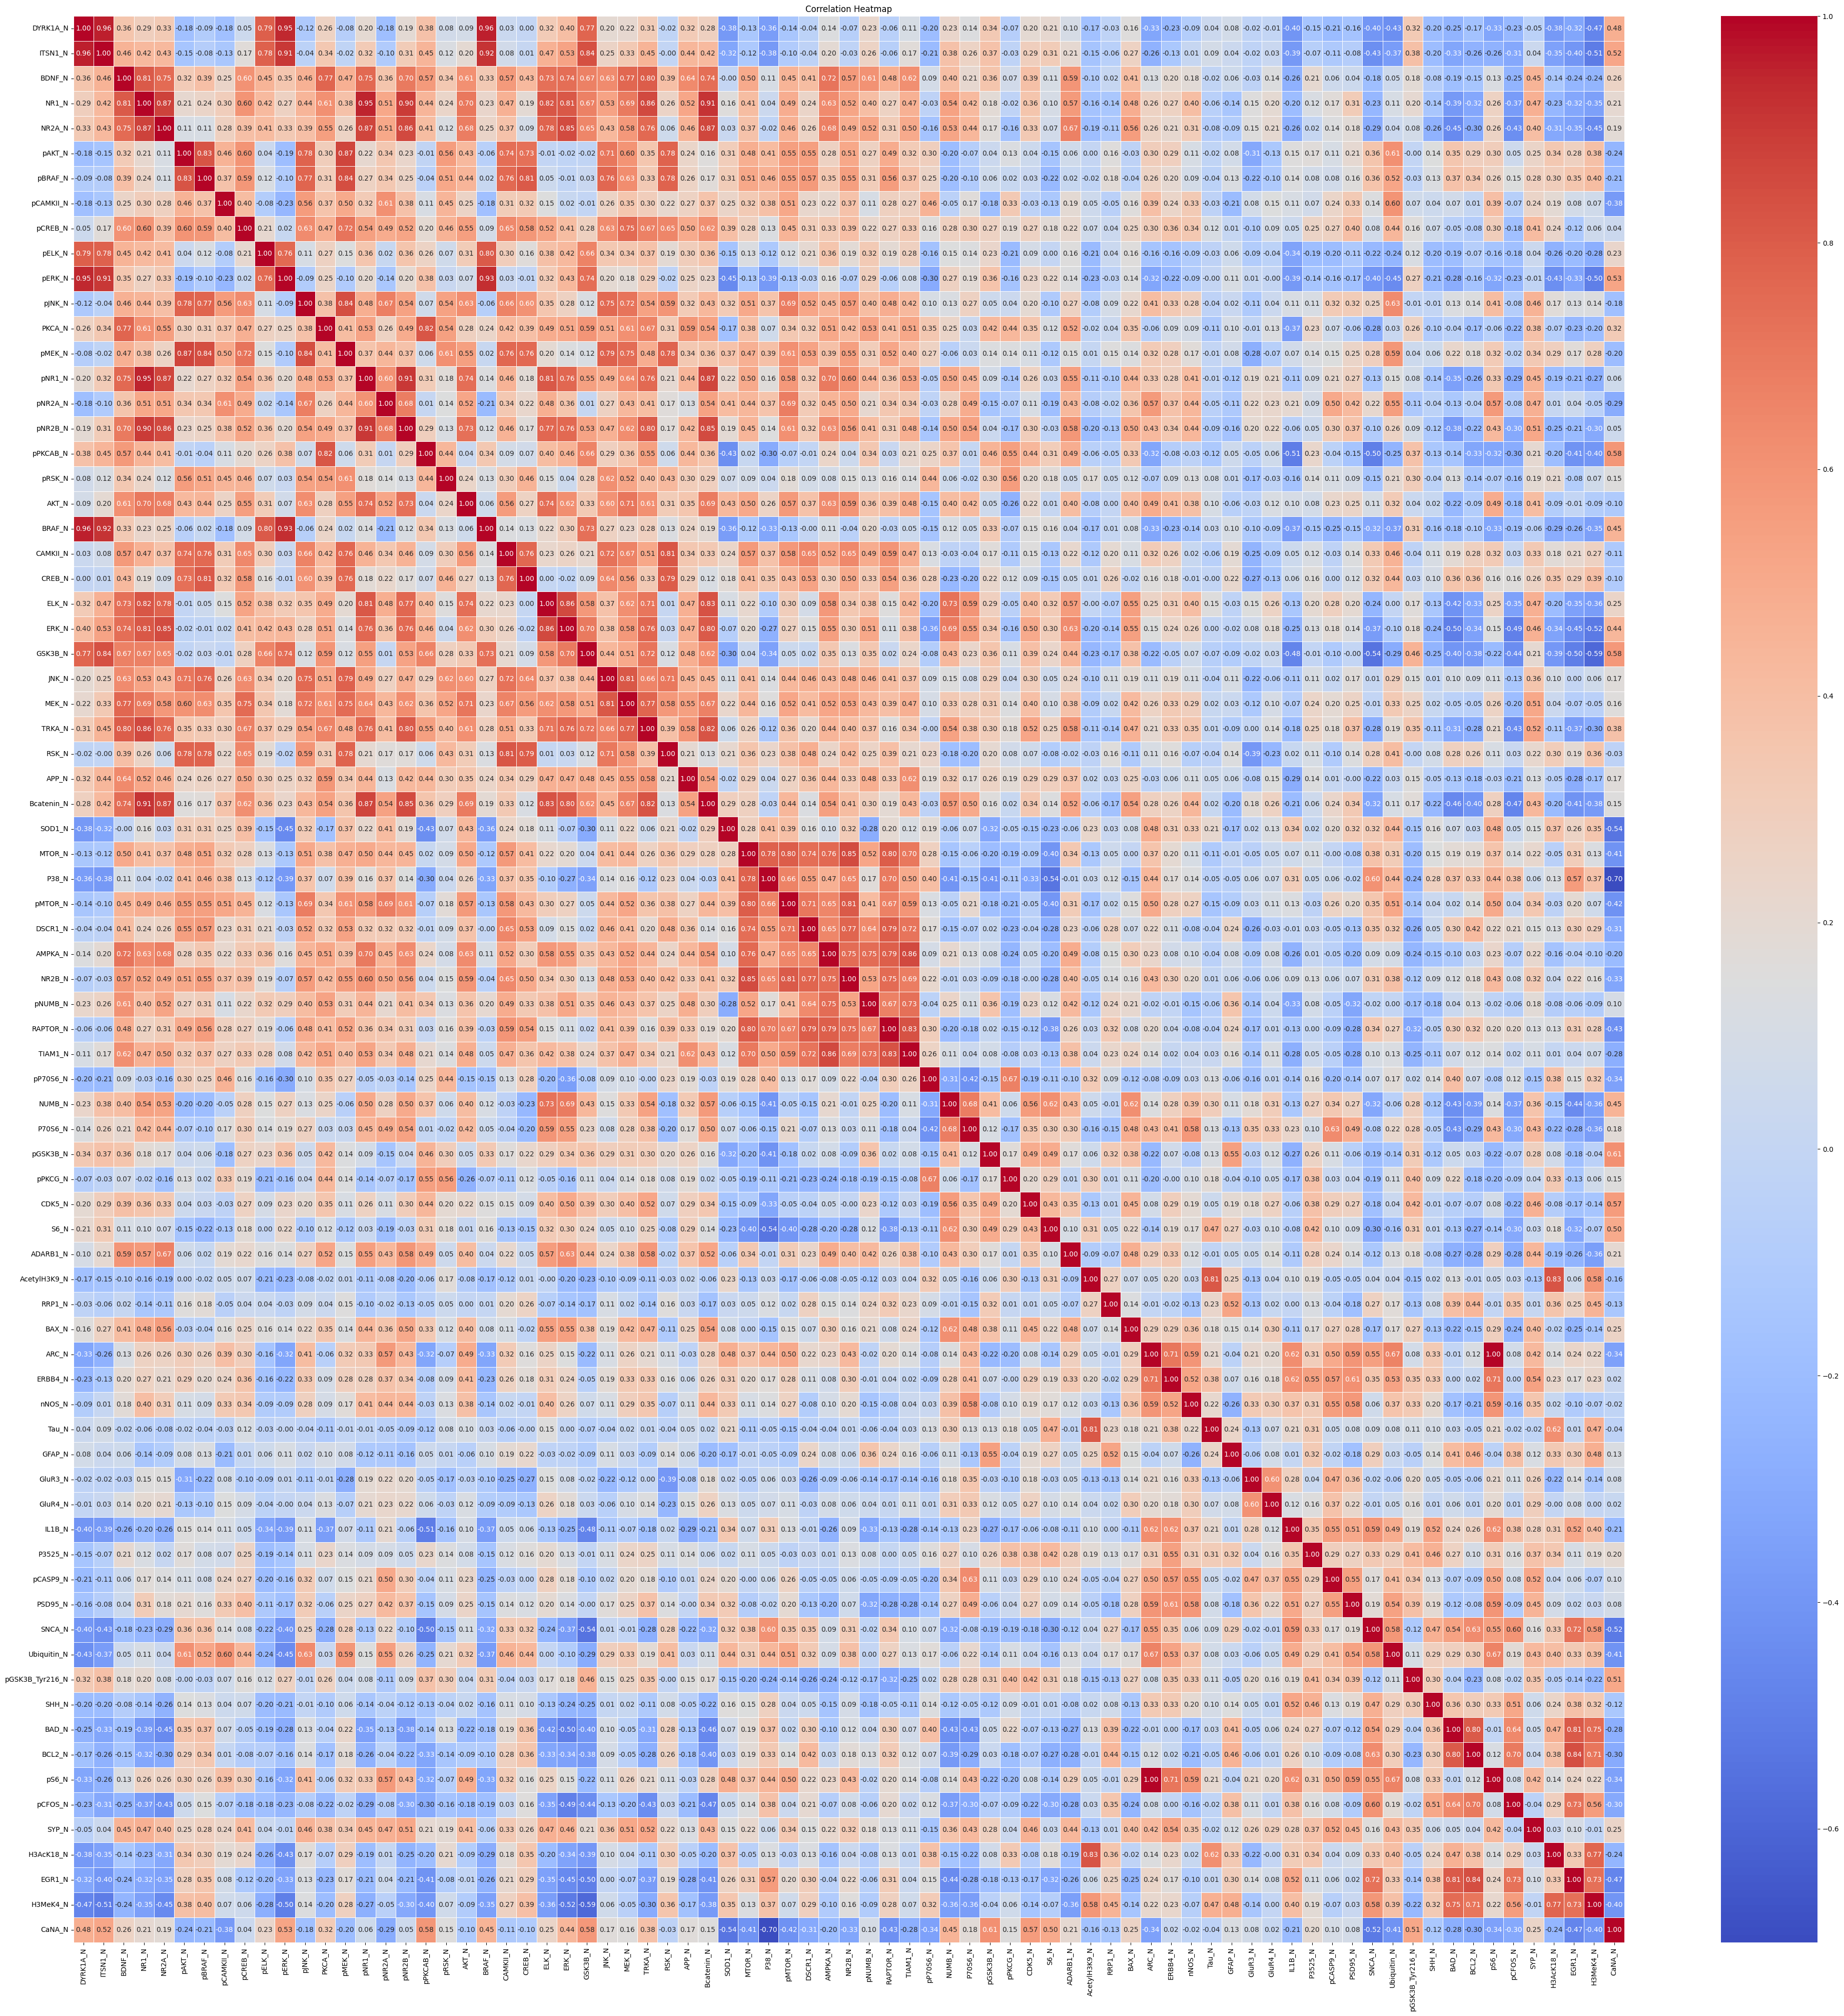

In [27]:
plt.figure(figsize=(50, 50))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [28]:
fig = px.imshow(correlation_matrix,
                labels=dict(x="Features", y="Features", color="Correlation"),
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                color_continuous_scale='Viridis')

fig.update_layout(title='Correlation Heatmap',
                  xaxis=dict(side="top"),
                   width=1000,
                  height=1000
                  )

fig.show()

In [29]:
# Proteins correlation with each class

In [30]:
protein_expression = protein_data.drop(columns=['MouseID','Genotype','Treatment','Behavior'])

In [31]:
protein_expression.head(3)

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
1  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
2  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   

   pCAMKII_N   pCREB_N    pELK_N  ...     BAD_N  BCL2_N     pS6_N   pCFOS_N  \
0   2.373744  0.232224  1.750936  ...  0.122652     NaN  0.106305  0.108336   
1   2.292150  0.226972  1.596377  ...  0.116682     NaN  0.106592  0.104315   
2   2.283337  0.230247  1.561316  ...  0.118508     NaN  0.108303  0.106219   

      SYP_N  H3AcK18_N    EGR1_N  H3MeK4_N    CaNA_N   class  
0  0.427099   0.114783  0.131790  0.128186  1.675652  c-CS-m  
1  0.441581   0.111974  0.135103  0.131119  1.743610  c-CS-m  
2  0.435777   0.111883  0.133362  0.127431  1.926427  c-CS-m  

[3 rows x 78 columns]

In [32]:
protein_expression = protein_expression.sample(frac=1, random_state=42)
protein_expression.reset_index(drop=True, inplace=True)

In [33]:
protein_expression.head()

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0  0.492403  0.658379  0.339319  2.446823  4.613029  0.273250  0.218692   
1  0.182518  0.298969  0.229708  1.725425  2.699869  0.174822  0.139538   
2  0.288450  0.515536  0.286301  2.043971  3.312488  0.218683  0.199140   
3  0.571500  0.747993  0.311465  2.450201  3.827270  0.200075  0.165454   
4  0.287189  0.523557  0.319746  2.425490  3.589465  0.244044  0.189254   

   pCAMKII_N   pCREB_N    pELK_N  ...     BAD_N    BCL2_N     pS6_N   pCFOS_N  \
0   4.184162  0.261280  1.540285  ...       NaN       NaN  0.108074  0.111444   
1   2.747931  0.187309  0.784086  ...  0.159926  0.145324  0.127593  0.130490   
2   2.929255  0.226304  1.252687  ...  0.193266       NaN  0.121347  0.153438   
3   2.424611  0.192925  1.415956  ...       NaN  0.109267  0.111439  0.104537   
4   3.807835  0.250662  1.075172  ...  0.130058       NaN  0.113900       NaN   

      SYP_N  H3AcK18_N    EGR1_N  H3MeK4_N    CaNA_N   class  
0  0.295769        NaN       NaN       NaN  1.452390  c-CS-s  
1  0.399351        NaN  0.220072  0.338278  1.090741  c-SC-s  
2  0.506160        NaN  0.286819       NaN  1.152579  t-SC-m  
3  0.384723   0.149360       NaN       NaN  1.720202  t-CS-m  
4  0.305273   0.287167  0.127822  0.220443  1.372286  t-SC-s  

[5 rows x 78 columns]

In [34]:
protein_expression.isnull().sum()

DYRK1A_N       3
ITSN1_N        3
BDNF_N         3
NR1_N          3
NR2A_N         3
            ... 
H3AcK18_N    180
EGR1_N       210
H3MeK4_N     270
CaNA_N         0
class          0
Length: 78, dtype: int64

In [35]:
imputer = SimpleImputer(strategy='constant', fill_value=0)
protein_expression = pd.DataFrame(imputer.fit_transform(protein_expression), columns=protein_expression.columns)

In [36]:
protein_expression.isnull().sum()

DYRK1A_N     0
ITSN1_N      0
BDNF_N       0
NR1_N        0
NR2A_N       0
            ..
H3AcK18_N    0
EGR1_N       0
H3MeK4_N     0
CaNA_N       0
class        0
Length: 78, dtype: int64

In [37]:
label_encoder = LabelEncoder()
protein_expression['class'] = label_encoder.fit_transform(protein_expression['class'])

In [38]:
protein_expression.head(3)

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0  0.492403  0.658379  0.339319  2.446823  4.613029   0.27325  0.218692   
1  0.182518  0.298969  0.229708  1.725425  2.699869  0.174822  0.139538   
2   0.28845  0.515536  0.286301  2.043971  3.312488  0.218683   0.19914   

  pCAMKII_N   pCREB_N    pELK_N  ...     BAD_N    BCL2_N     pS6_N   pCFOS_N  \
0  4.184162   0.26128  1.540285  ...         0         0  0.108074  0.111444   
1  2.747931  0.187309  0.784086  ...  0.159926  0.145324  0.127593   0.13049   
2  2.929255  0.226304  1.252687  ...  0.193266         0  0.121347  0.153438   

      SYP_N H3AcK18_N    EGR1_N  H3MeK4_N    CaNA_N class  
0  0.295769         0         0         0   1.45239     1  
1  0.399351         0  0.220072  0.338278  1.090741     3  
2   0.50616         0  0.286819         0  1.152579     6  

[3 rows x 78 columns]

In [39]:
protein_expression.shape

(1080, 78)

In [40]:
X = protein_expression.drop(columns='class')
y = protein_expression['class']

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [43]:
feature_importances = clf.feature_importances_

In [44]:
feature_importances

array([0.02159812, 0.02892443, 0.00617256, 0.00785173, 0.00552306,
       0.00870213, 0.00530495, 0.02287241, 0.00601483, 0.00702716,
       0.0444057 , 0.01078814, 0.00939418, 0.00514481, 0.00642029,
       0.01563172, 0.00486307, 0.02453233, 0.00660139, 0.01605852,
       0.01921164, 0.0085681 , 0.00509874, 0.00741575, 0.00459861,
       0.00840665, 0.00510823, 0.00519705, 0.00655808, 0.00523938,
       0.0313397 , 0.00455584, 0.0604186 , 0.01220426, 0.01896557,
       0.01007576, 0.00910788, 0.00826492, 0.01150075, 0.01896823,
       0.01115422, 0.00649957, 0.02288078, 0.00917484, 0.004639  ,
       0.02070024, 0.03600285, 0.00834875, 0.01783744, 0.01057539,
       0.01911356, 0.01054737, 0.00520913, 0.0220591 , 0.00976502,
       0.0102722 , 0.02778965, 0.00630535, 0.00668281, 0.00696259,
       0.01361874, 0.00838377, 0.00791601, 0.01137502, 0.00739482,
       0.02696089, 0.00697091, 0.00732659, 0.01186162, 0.00686842,
       0.02259407, 0.00525198, 0.00823261, 0.01278226, 0.00500

In [45]:
n_classes = 8  # Number of classes
n_features = len(feature_importances)
feature_names = protein_expression.columns.tolist()

In [46]:
feature_names = [x for x in feature_names if x != 'class']

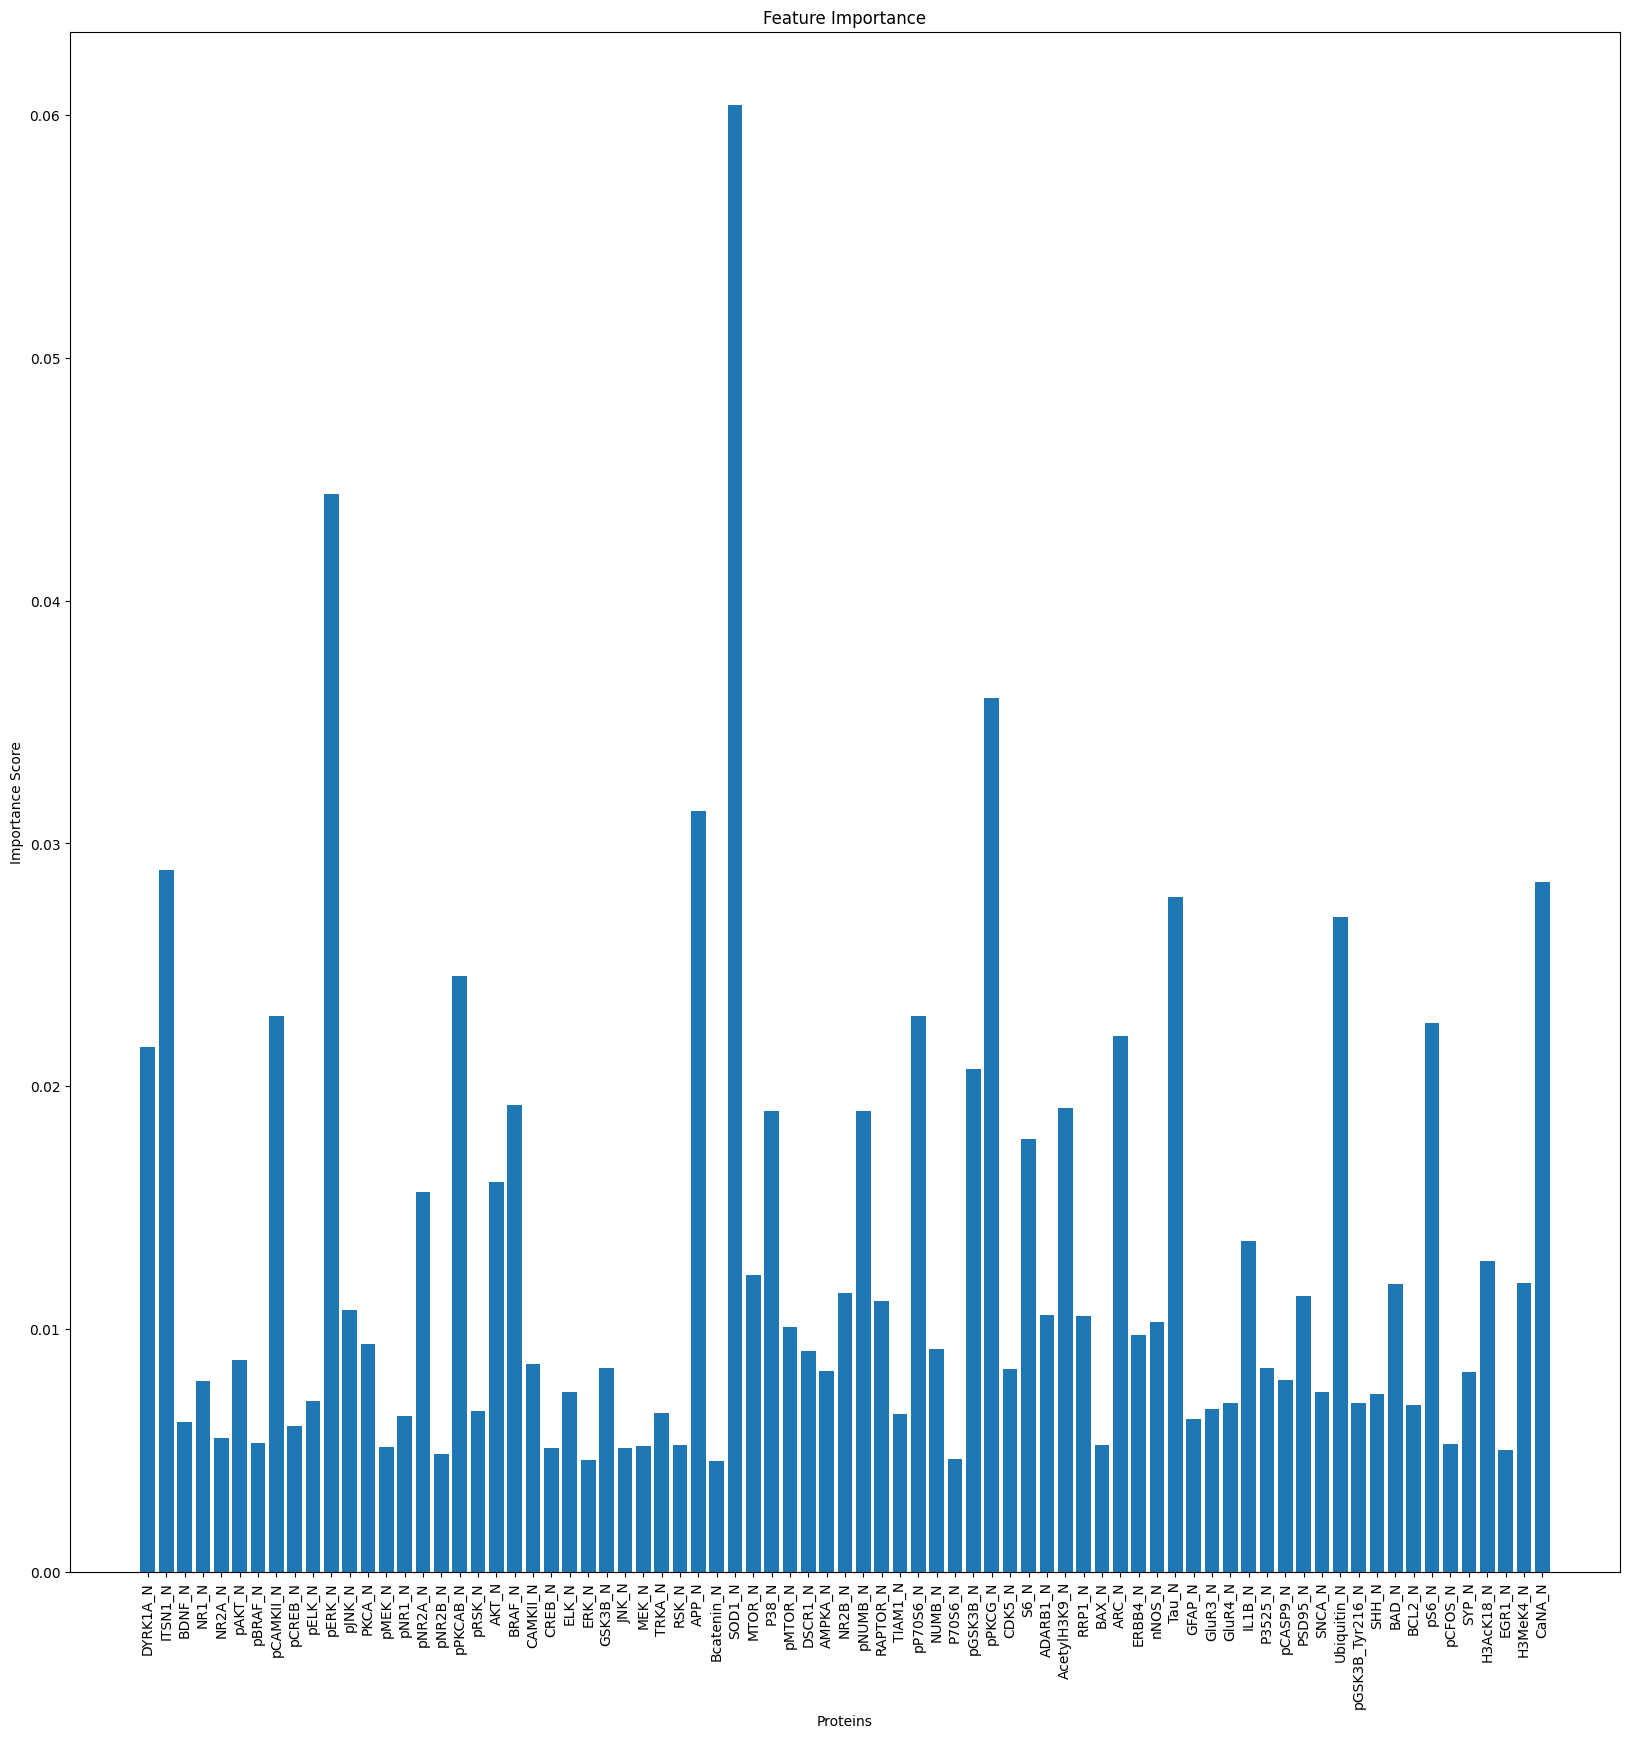

In [47]:
plt.figure(figsize=(20, 20))
plt.bar(range(len(feature_importances)), feature_importances, align='center')
plt.xticks(range(len(feature_importances)), feature_names, rotation=90)
plt.xlabel('Proteins')
plt.ylabel('Importance Score')
plt.title('Feature Importance')
plt.show()

In [48]:
protein_expression['class'].value_counts()

2    150
0    150
1    135
3    135
6    135
4    135
7    135
5    105
Name: class, dtype: int64

In [49]:
# visualising feature importance for each class

In [50]:
class_of_interest = 0
class_index_of_interest = list(clf.classes_).index(class_of_interest)

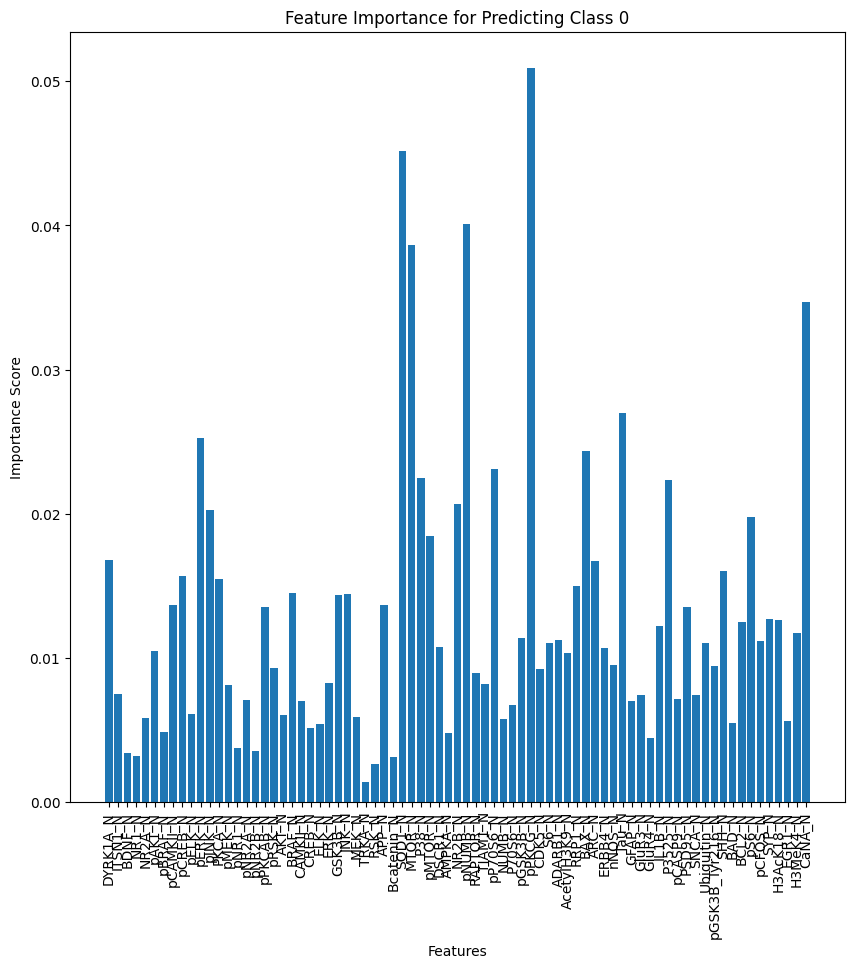

In [51]:
importances_per_class = []
for class_index in range(8):  # Assuming you have 8 classes (0 to 7)
    clf.fit(X_train, (y_train == class_index).astype(int))
    importances_per_class.append(clf.feature_importances_)
class_index_of_interest = 0
importance_per_class = importances_per_class[class_index_of_interest]
plt.figure(figsize=(10,10))
plt.bar(range(len(importance_per_class)), importance_per_class, align='center')
plt.xticks(range(len(importance_per_class)), feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title(f'Feature Importance for Predicting Class {class_index_of_interest}')
plt.show()

In [52]:
protein_class.head()

class   DYRK1A_N     ITSN1_N     BDNF_N       NR1_N      NR2A_N  \
0  c-CS-m  72.068463   97.888099  50.882614  357.262336  646.281072   
1  c-CS-s  80.561023  104.273350  46.212571  326.404225  577.810416   
2  c-SC-m  40.980441   65.454125  43.641865  321.844990  518.912375   
3  c-SC-s  37.101160   60.662751  42.307991  324.671514  528.268007   
4  t-CS-m  83.604680  107.595879  42.218850  296.533023  481.404572   

      pAKT_N    pBRAF_N   pCAMKII_N    pCREB_N  ...      SHH_N      BAD_N  \
0  34.489790  27.331679  437.428003  29.772607  ...  34.036583  18.825781   
1  28.677077  22.728024  396.302787  28.139292  ...  29.000491  13.020258   
2  36.187930  28.432012  710.449078  31.222310  ...  33.670450  17.267993   
3  31.504675  24.971563  453.773827  29.018092  ...  32.650108  18.734506   
4  28.838875  23.484025  421.443105  27.458326  ...  29.286033  15.810054   

      BCL2_N      pS6_N    pCFOS_N      SYP_N  H3AcK18_N     EGR1_N  \
0  15.904735  17.967242  14.871518  70.110492  17.043256  20.951926   
1  13.291914  15.189144  17.138759  60.118410  15.281887  17.486039   
2  11.698487  19.216169  21.542070  68.531036  22.279724  22.820599   
3  13.973645  17.945421  18.225918  63.654123  18.297566  24.082788   
4  15.840650  14.606458  15.331443  55.835644  17.944651  17.047729   

    H3MeK4_N      CaNA_N  
0  16.080782  228.548841  
1  15.480669  218.377167  
2  19.874248  151.493594  
3  23.007617  156.281214  
4  18.996648  220.500984  

[5 rows x 78 columns]

In [53]:
protein_class = protein_class.set_index('class')

In [54]:
protein_class = protein_class.transpose()

In [55]:
protein_class.head()

class         c-CS-m      c-CS-s      c-SC-m      c-SC-s      t-CS-m  \
DYRK1A_N   72.068463   80.561023   40.980441   37.101160   83.604680   
ITSN1_N    97.888099  104.273350   65.454125   60.662751  107.595879   
BDNF_N     50.882614   46.212571   43.641865   42.307991   42.218850   
NR1_N     357.262336  326.404225  321.844990  324.671514  296.533023   
NR2A_N    646.281072  577.810416  518.912375  528.268007  481.404572   

class         t-CS-s      t-SC-m      t-SC-s  
DYRK1A_N   55.202171   44.531192   44.548415  
ITSN1_N    79.753430   76.515771   72.475426  
BDNF_N     32.073347   43.343548   42.977405  
NR1_N     229.383673  321.225185  296.833883  
NR2A_N    369.058044  547.590109  470.592265

<ipython-input-56-e3ca6290fbf8>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



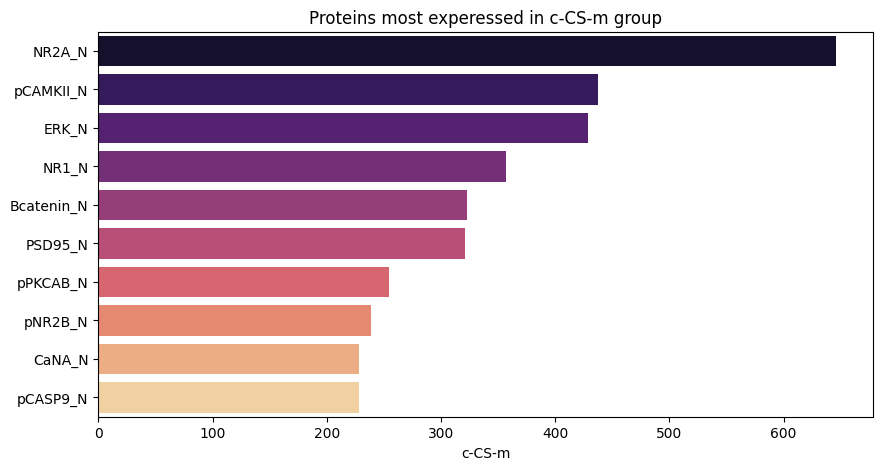

In [56]:
#c-CS-m
c_cs_m_class = protein_class[['c-CS-m']]
c_cs_m_class.sort_values('c-CS-m',ascending=False,inplace=True)
c_cs_m_top_10 = c_cs_m_class.iloc[0:10]

plt.figure(figsize=(10, 5))
sns.barplot(x=c_cs_m_top_10['c-CS-m'], y=c_cs_m_top_10.index,palette='magma')
plt.title('Proteins most experessed in c-CS-m group')
plt.show()

<ipython-input-57-22acfbd7493a>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



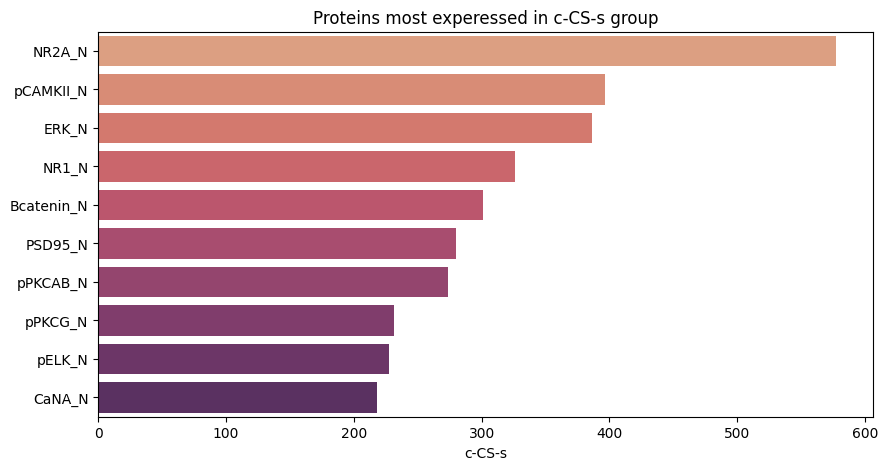

In [57]:
#c-CS-s
c_cs_s_class = protein_class[['c-CS-s']]
c_cs_s_class.sort_values('c-CS-s',ascending=False,inplace=True)
c_cs_s_top_10 = c_cs_s_class.iloc[0:10]

plt.figure(figsize=(10, 5))
sns.barplot(x=c_cs_s_top_10['c-CS-s'], y=c_cs_s_top_10.index,palette="flare")
plt.title('Proteins most experessed in c-CS-s group')
plt.show()

<ipython-input-58-567cd3077d17>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



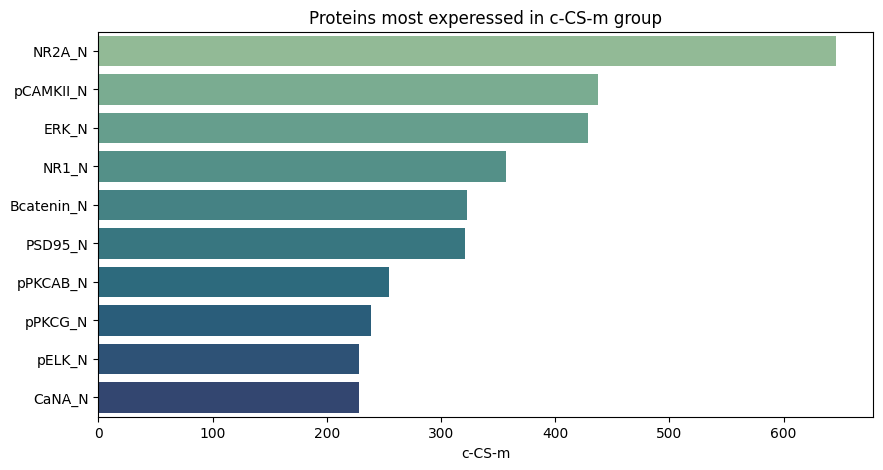

In [58]:
#c-CS-m
c_cs_m_class = protein_class[['c-CS-m']]
c_cs_m_class.sort_values('c-CS-m',ascending=False,inplace=True)
c_cs_m_top_10 = c_cs_m_class.iloc[0:10]

plt.figure(figsize=(10, 5))
sns.barplot(x=c_cs_m_top_10['c-CS-m'], y=c_cs_s_top_10.index,palette="crest")
plt.title('Proteins most experessed in c-CS-m group')
plt.show()

<ipython-input-59-11ddafd0233f>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



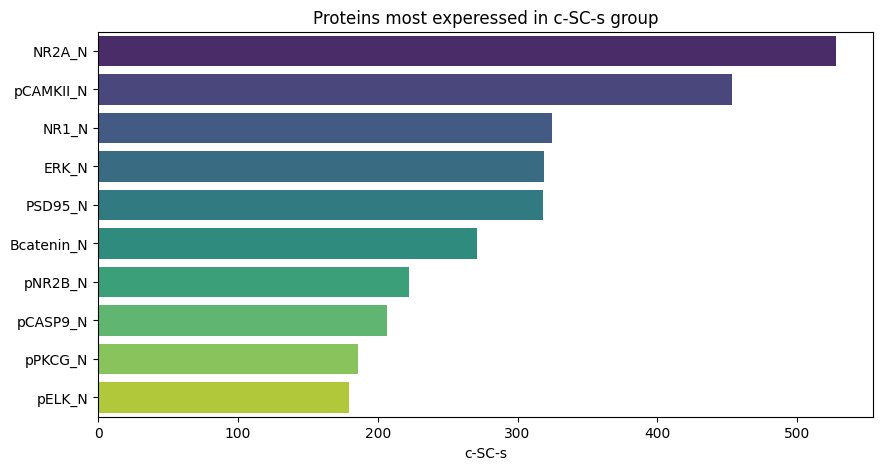

In [59]:
#c-SC-s
c_sc_s_class = protein_class[['c-SC-s']]
c_sc_s_class.sort_values('c-SC-s',ascending=False,inplace=True)
c_sc_s_top_10 = c_sc_s_class.iloc[0:10]

plt.figure(figsize=(10, 5))
sns.barplot(x=c_sc_s_top_10['c-SC-s'], y=c_sc_s_top_10.index,palette="viridis")
plt.title('Proteins most experessed in c-SC-s group')
plt.show()

<ipython-input-60-939e04ad7399>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



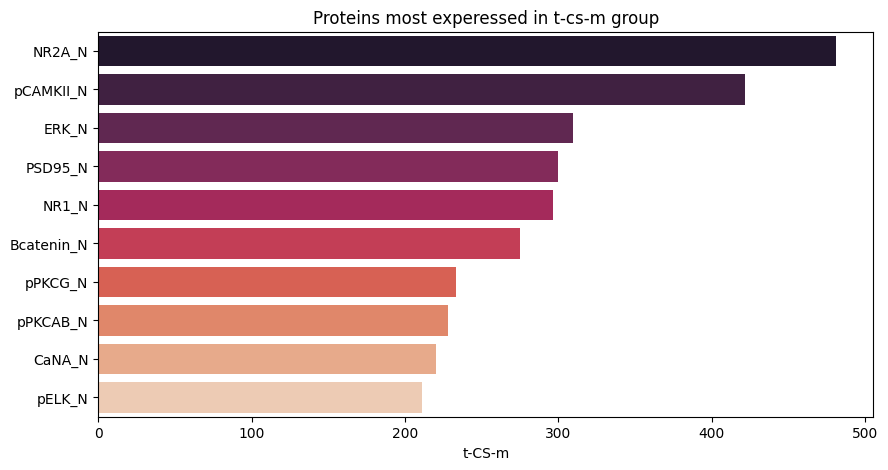

In [60]:
# t-CS-m
t_cs_m_class = protein_class[['t-CS-m']]
t_cs_m_class.sort_values('t-CS-m',ascending=False,inplace=True)
t_cs_m_top_10 = t_cs_m_class.iloc[0:10]

plt.figure(figsize=(10, 5))
sns.barplot(x=t_cs_m_top_10['t-CS-m'], y=t_cs_m_top_10.index,palette="rocket")
plt.title('Proteins most experessed in t-cs-m group')
plt.show()

<ipython-input-61-088f64473eea>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



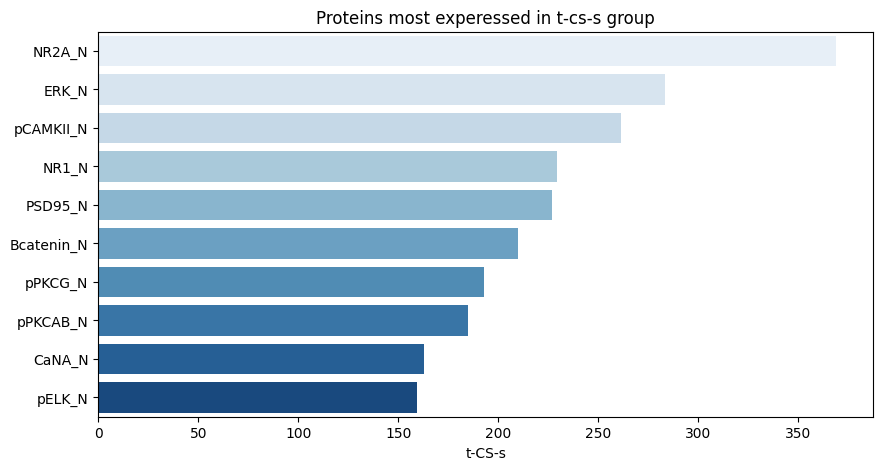

In [61]:
# t-CS-s
t_cs_s_class = protein_class[['t-CS-s']]
t_cs_s_class.sort_values('t-CS-s',ascending=False,inplace=True)
t_cs_s_top_10 = t_cs_s_class.iloc[0:10]

plt.figure(figsize=(10, 5))
sns.barplot(x=t_cs_s_top_10['t-CS-s'], y=t_cs_s_top_10.index,palette="Blues")
plt.title('Proteins most experessed in t-cs-s group')
plt.show()


<ipython-input-62-e20f04c8a87e>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



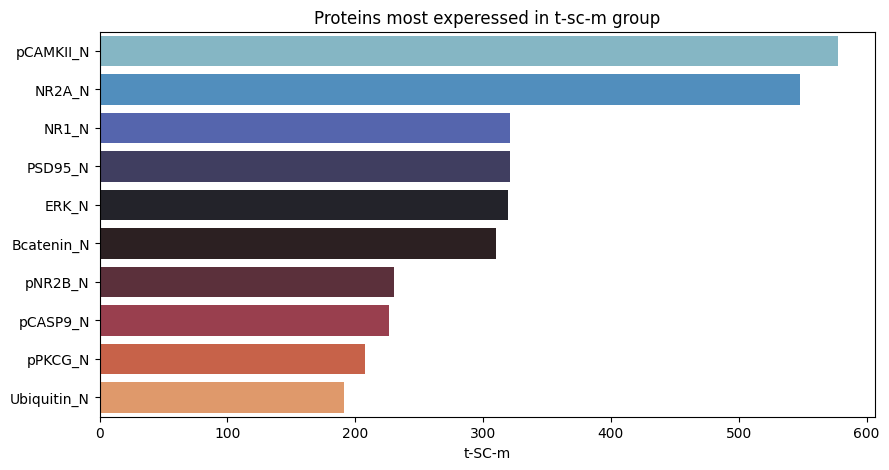

In [62]:
# t-SC-m
t_sc_m_class = protein_class[['t-SC-m']]
t_sc_m_class.sort_values('t-SC-m',ascending=False,inplace=True)
t_sc_m_top_10 = t_sc_m_class.iloc[0:10]

plt.figure(figsize=(10, 5))
sns.barplot(x=t_sc_m_top_10['t-SC-m'], y=t_sc_m_top_10.index,palette="icefire")
plt.title('Proteins most experessed in t-sc-m group')
plt.show()

<ipython-input-63-e66fbcdd9163>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



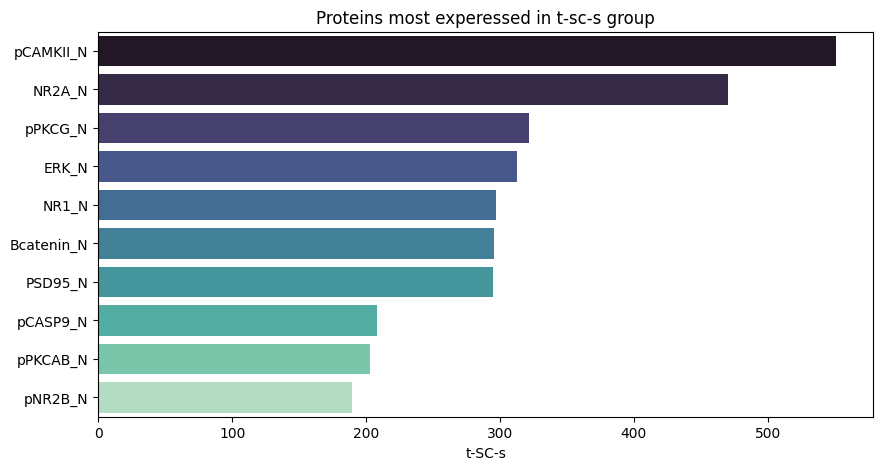

In [63]:
#t-SC-s
t_sc_s_class = protein_class[['t-SC-s']]
t_sc_s_class.sort_values('t-SC-s',ascending=False,inplace=True)
t_sc_s_top_10 = t_sc_s_class.iloc[0:10]

plt.figure(figsize=(10, 5))
sns.barplot(x=t_sc_s_top_10['t-SC-s'], y=t_sc_s_top_10.index,palette="mako")
plt.title('Proteins most experessed in t-sc-s group')
plt.show()
